# Emilo Gopaul
## 816007035
### Assignment 3

In [331]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# Part A.

In [167]:
df = pd.read_csv('creditcard_approval.csv', sep = ",")

In [168]:
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


#### As we can see, there is no column names for this dataset, so we will have to add headers for each column name as shown below.

In [169]:
header = []

for i in range(0,15):
    header.append("Col_" + str(i))
    
header.append("Target")
    
print(header)

['Col_0', 'Col_1', 'Col_2', 'Col_3', 'Col_4', 'Col_5', 'Col_6', 'Col_7', 'Col_8', 'Col_9', 'Col_10', 'Col_11', 'Col_12', 'Col_13', 'Col_14', 'Target']


In [170]:
df = pd.read_csv('creditcard_approval.csv', sep = ",", names = header)
df.head()

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Col_11,Col_12,Col_13,Col_14,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Col_0     690 non-null object
Col_1     690 non-null object
Col_2     690 non-null float64
Col_3     690 non-null object
Col_4     690 non-null object
Col_5     690 non-null object
Col_6     690 non-null object
Col_7     690 non-null float64
Col_8     690 non-null object
Col_9     690 non-null object
Col_10    690 non-null int64
Col_11    690 non-null object
Col_12    690 non-null object
Col_13    690 non-null object
Col_14    690 non-null int64
Target    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


#### We can clearly see that Col_1 and Col_13 both contain float and int types respectively, however they are listed as type object, we will attempt to fix this as shown below.

In [172]:
df["Col_1"].describe() 

count     690
unique    350
top         ?
freq       12
Name: Col_1, dtype: object

#### We see that the '?' character is causing some problems so we will replace this with an integer (0) which is unique to the column

In [173]:
df['Col_1'].apply(type).value_counts()

<class 'str'>    690
Name: Col_1, dtype: int64

#### All the entries in this column are of type string so we convert them to float in the same code.

In [174]:
df["Col_1"] = df['Col_1'].apply(lambda x: x.replace('?', '0')
                                if isinstance(x, str) else x).astype(float)

In [175]:
mean = np.mean(df["Col_1"])
mean

31.01915942028989

In [176]:
df['Col_1'].replace(0,mean)
df["Col_1"].describe()

count    690.000000
mean      31.019159
std       12.552078
min        0.000000
25%       22.440000
50%       28.170000
75%       37.707500
max       80.250000
Name: Col_1, dtype: float64

#### We replaced the unique value '0' with the mean of all the other values in the column in an attempt to not skew the data

#### We repeat the process for "Col_13"

In [177]:
df["Col_13"] = df['Col_13'].apply(lambda x: x.replace('?', '0')
                                if isinstance(x, str) else x).astype(int)

In [178]:
mean1 = np.mean(df["Col_13"])
mean1 = np.ceil(mean1)    # The ceil function is used so that we don't add float values to the 'int' column 

In [179]:
df['Col_13'].replace(0,mean1)
df["Col_13"].describe()

count     690.000000
mean      180.547826
std       173.970323
min         0.000000
25%        60.000000
50%       160.000000
75%       272.000000
max      2000.000000
Name: Col_13, dtype: float64

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Col_0     690 non-null object
Col_1     690 non-null float64
Col_2     690 non-null float64
Col_3     690 non-null object
Col_4     690 non-null object
Col_5     690 non-null object
Col_6     690 non-null object
Col_7     690 non-null float64
Col_8     690 non-null object
Col_9     690 non-null object
Col_10    690 non-null int64
Col_11    690 non-null object
Col_12    690 non-null object
Col_13    690 non-null int32
Col_14    690 non-null int64
Target    690 non-null object
dtypes: float64(3), int32(1), int64(2), object(10)
memory usage: 83.6+ KB


#### We will now transform the 'Target' column to int by using the Label encoder

In [181]:
encoder = LabelEncoder()
df["Target"] = encoder.fit_transform(df["Target"])

df.head()

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Col_11,Col_12,Col_13,Col_14,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,0


In [182]:
df["Target"].value_counts()

1    383
0    307
Name: Target, dtype: int64

#### We have a fairly equal spread of the 'Target' column which is good.

In [183]:
text = df.dtypes[df.dtypes == "object"].index
df[text].describe()

,Col_0,Col_3,Col_4,Col_5,Col_6,Col_8,Col_9,Col_11,Col_12
count,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,468,519,519,137,399,361,395,374,625


 We must also label encode all the other columns so that the algorithms we plan to use can work.  They will not work with string data types. I also assumed here that if there were any '?' present if these columns that it would be a valid entry.

In [184]:
encoder1 = LabelEncoder()
df[text] = df[text].apply(encoder1.fit_transform)
df.head()

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Col_11,Col_12,Col_13,Col_14,Target
0,2,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,202,0,0
1,1,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,43,560,0
2,1,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,280,824,0
3,2,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,100,3,0
4,2,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,120,0,0


In [187]:
df1 = df

In [200]:
inputs = df.drop("Target", axis=1).copy()
target = df["Target"]
x = inputs.values
y = target.values
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((517, 15), (517,), (173, 15), (173,))

### We have sucessfully cleaned the data. 

# Part B.

## ~ Section 1 ~

In [322]:
neighbors = np.arange(1,51)
cv_scores = {}

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, scoring = 'recall', cv=10)
    cv_scores[k] = scores.mean()

In [323]:
bess_k = max(cv_scores, key=lambda k: cv_scores[k])
bess_k

49

We ran a loop testing the recall score for a KNN classifier for each k from 1 through 50, looking ffor the best k that would give us the highest recall score and we can see that k = 49 is an optimal choice for the KNN classifier. Please note that I tried 'accuracy', 'f1' and 'precision'as my scoring parameter which gave me different values of k, however, when I ran the code below, their metrics were not as high, therefore I chose 'recall' as my scoring parameter.

In [416]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=49))
clfs.append(GaussianNB())
clfs.append(RandomForestClassifier(n_estimators=50))

Here, we placed all the classifiers in a list so that we can fit and transform them in a 'for' loop since the code for each one is pretty similar.

In [417]:
names=[]
acc_scores=[]
f1_scores=[]
prec_scores=[]
rec_scores=[]

for classifier in clfs:
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = round(accuracy_score(y_test,y_pred) * 100, 2)
    f1 = round(f1_score(y_test,y_pred) * 100, 2)
    prec = round(precision_score(y_test,y_pred) * 100, 2)
    rec = round(recall_score(y_test,y_pred) * 100, 2)
    name = str(classifier).split('(')[0]
    print('--------------------------------------------------------------------')
    print(name, '( ', acc, ' ||', f1, ' ||', prec, ' ||', rec, ' )')
    names.append(name)
    acc_scores.append(acc)
    f1_scores.append(f1)
    prec_scores.append(prec)
    rec_scores.append(rec)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


--------------------------------------------------------------------
LogisticRegression (  84.97  || 87.13  || 88.0  || 86.27  )


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


--------------------------------------------------------------------
SVC (  57.23  || 72.39  || 58.43  || 95.1  )
--------------------------------------------------------------------
KNeighborsClassifier (  65.9  || 72.3  || 69.37  || 75.49  )
--------------------------------------------------------------------
GaussianNB (  79.19  || 83.93  || 77.05  || 92.16  )
--------------------------------------------------------------------
RandomForestClassifier (  84.97  || 87.74  || 84.55  || 91.18  )


We print out each classifier along with the metric next to it. I decided to use 4 metrics for comparison : Accuracy, F1  score, Precision and Recall.

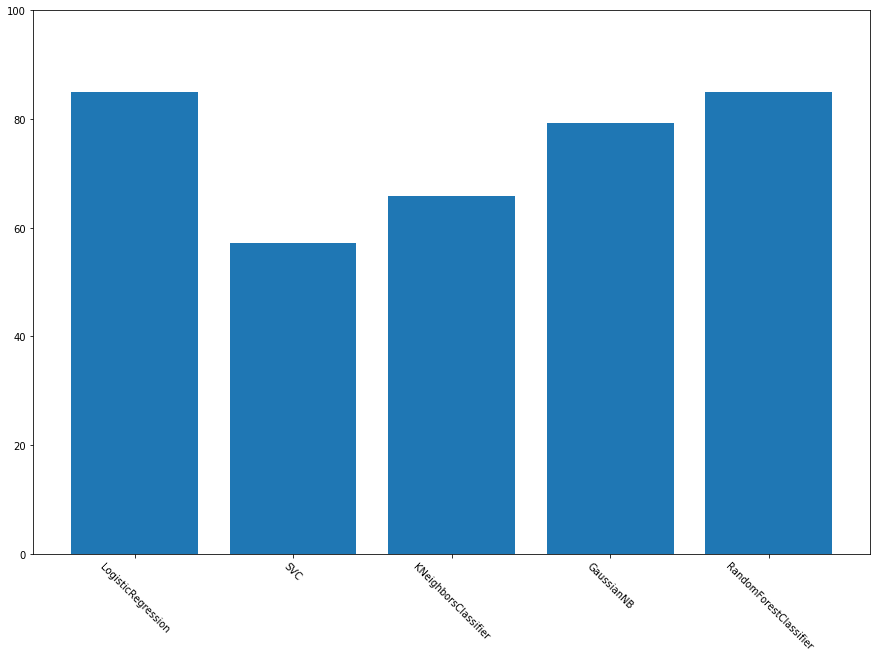

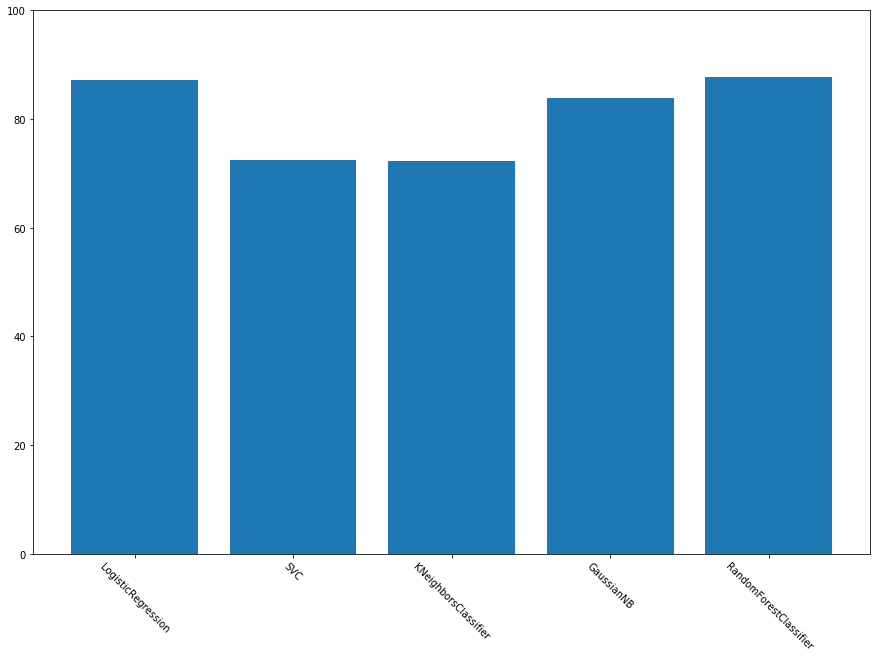

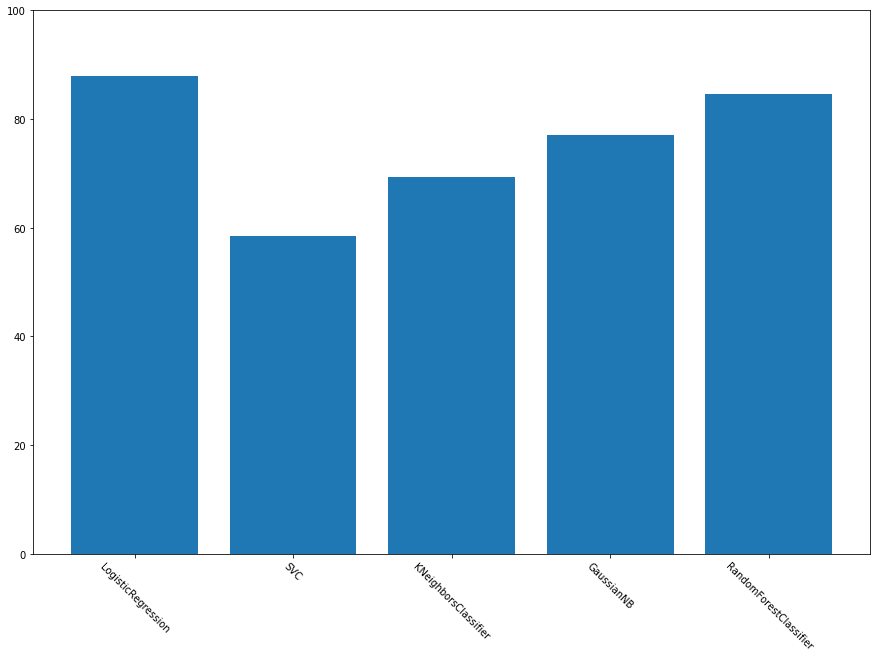

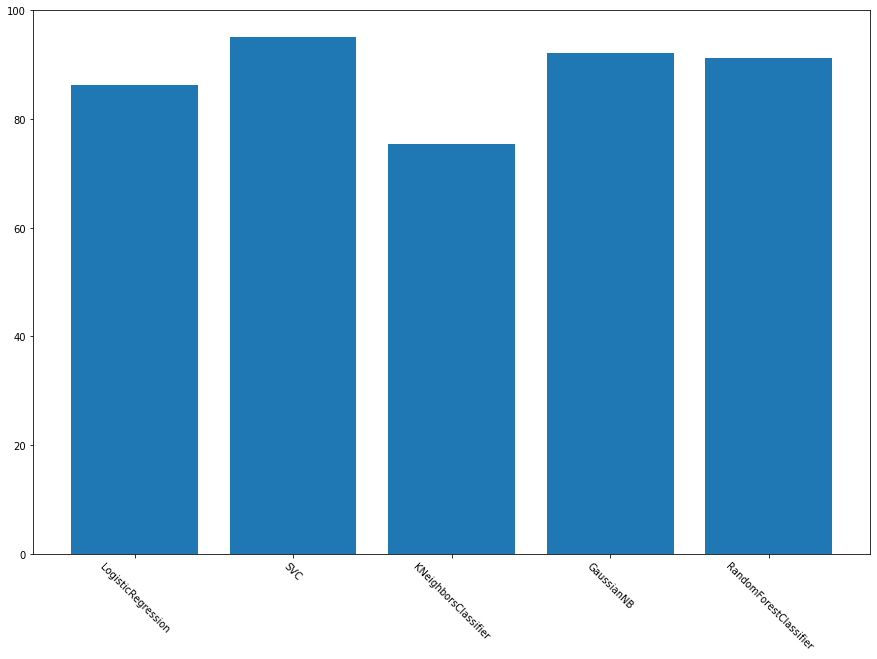

In [418]:
scores = [acc_scores, f1_scores, prec_scores, rec_scores]
titles = ['Accuracy Scores', 'F1 Scores','Precision Scores', 'Recall Scores']

for i in scores:
    plt.figure(figsize=(15,10))
    plt.bar(names, i)
    plt.xticks(rotation=-45)
    plt.ylim(0, 100)
    plt.show()

So I figured that the above code would be difficult to visualize so I decided to plot the graphs for each metric individually.

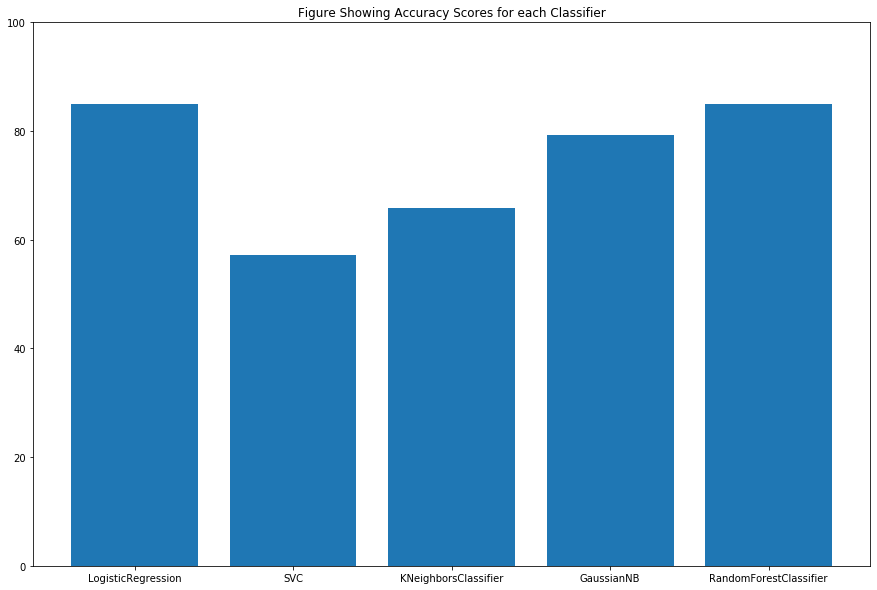

In [419]:
plt.figure(figsize=(15,10))
plt.bar(names, acc_scores)
plt.title('Figure Showing Accuracy Scores for each Classifier')
plt.ylim(0, 100)
plt.show()

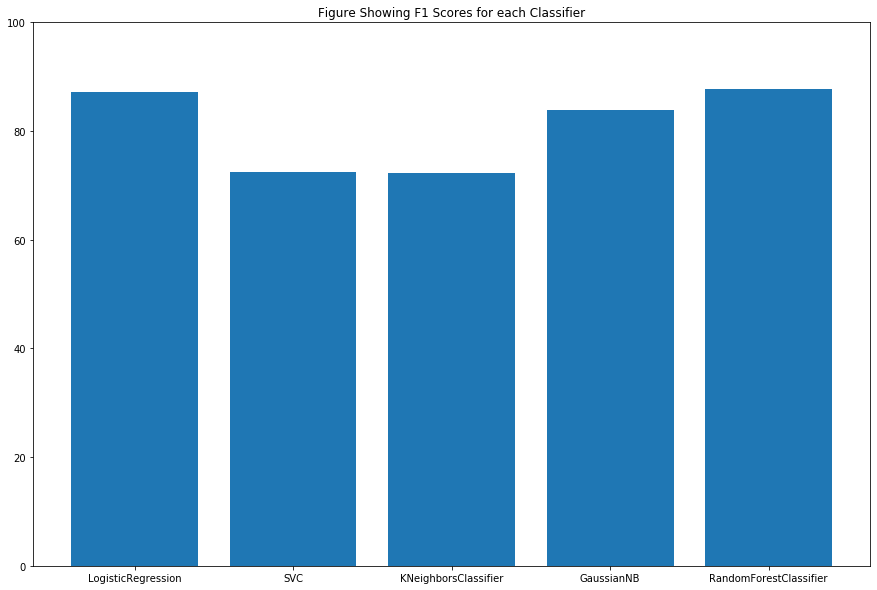

In [420]:
plt.figure(figsize=(15,10))
plt.bar(names, f1_scores)
plt.title('Figure Showing F1 Scores for each Classifier')
plt.ylim(0, 100)
plt.show()

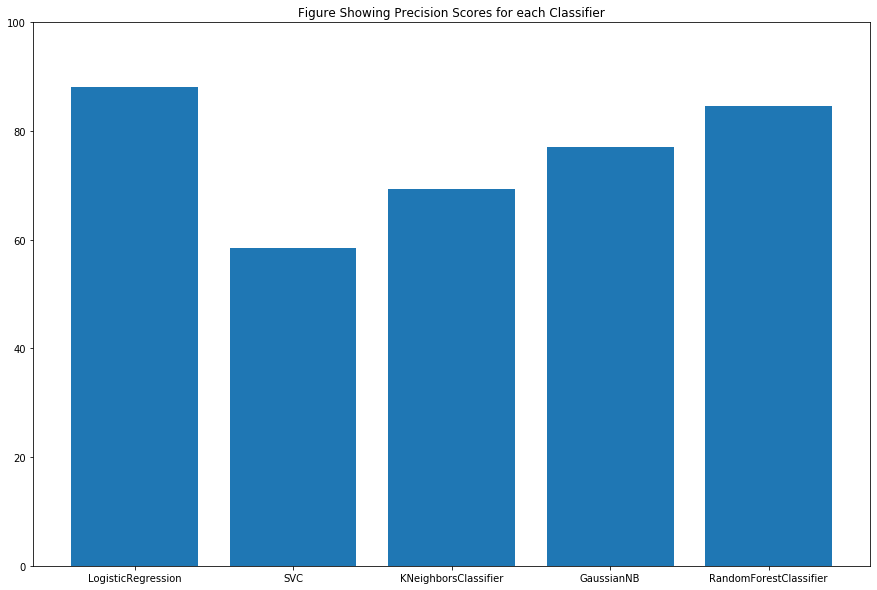

In [421]:
plt.figure(figsize=(15,10))
plt.bar(names, prec_scores)
plt.title('Figure Showing Precision Scores for each Classifier')
plt.ylim(0, 100)
plt.show()

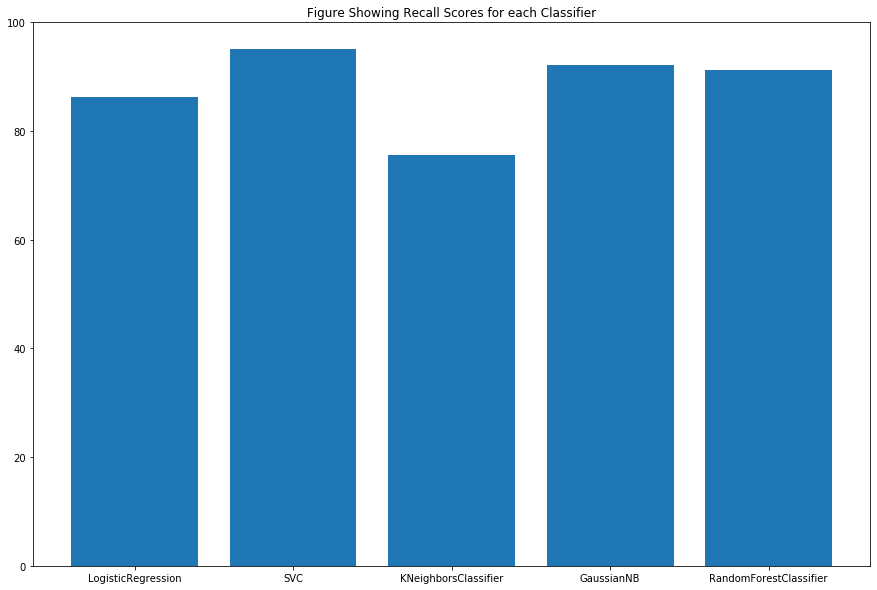

In [422]:
plt.figure(figsize=(15,10))
plt.bar(names, rec_scores)
plt.title('Figure Showing Recall Scores for each Classifier')
plt.ylim(0, 100)
plt.show()

From the 4 graphs shown above, we see that all five of the classifiers performed similar with respect to the 4 metrics we tested it against. However Randon Forest Classifier was the most consistent in its performance.

## ~ Section 2. ~

In [333]:
rf = clfs[4]
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [338]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [339]:
random_grid

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [340]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   39.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [341]:
rf_random.best_params_

{'n_estimators': 227,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [431]:
best_random = rf_random.best_estimator_
y_prediction = best_random.predict(x_test)
rec = round(recall_score(y_test,y_prediction) * 100, 2)
print("The recall score after tuning the parameters is ", rec)

The recall score after tuning the parameters is  92.16


In [432]:
before = rec_scores[4]
print("The intial recall score of the Randon Forest Classifier is ", before)

The intial recall score of the Randon Forest Classifier is  91.18


In [437]:
improvement = (rec - before) /before
print("We see an increase in recall by ", round(improvement * 100,2), '%')

We see an increase in recall by  1.07 %


# Part 3.

In [355]:
clf = df1.drop("Target", axis=1).copy()
clf.head()

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Col_11,Col_12,Col_13,Col_14
0,2,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,202,0
1,1,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,43,560
2,1,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,280,824
3,2,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,100,3
4,2,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,120,0


In [348]:
ss = StandardScaler()
ss.fit_transform(clf)

array([[ 0.66649628, -0.0150809 , -0.95661321, ..., -0.31717105,
         0.12339884, -0.19541334],
       [-1.29881326,  2.20448744, -0.06005053, ..., -0.31717105,
        -0.79121315, -0.08785188],
       [-1.29881326, -0.51974568, -0.8561017 , ..., -0.31717105,
         0.57207642, -0.03714433],
       ...,
       [-1.29881326, -0.45995128,  1.7571976 , ..., -0.31717105,
         0.11189429, -0.19522126],
       [ 0.66649628, -1.04434194, -0.91540349, ..., -0.31717105,
         0.57207642, -0.05135781],
       [ 0.66649628,  0.317376  , -0.27816051, ..., -0.31717105,
        -1.03856104, -0.19541334]])

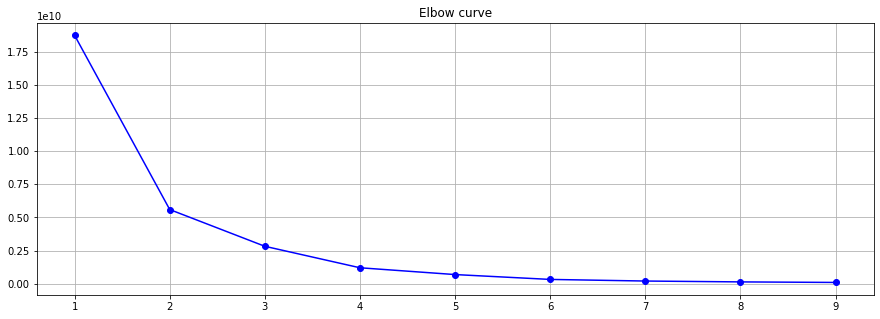

In [370]:
distortions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clf)
    distortions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,5))
plt.plot(range(1,10), distortions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')
plt.show()

Here we see that 2 is an optimal choice for k as it is has its steepest change in gradient.

In [374]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(clf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [375]:
z = kmeans.cluster_centers_
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

We can see that there are only 3 class labels which are labelled as '1'.

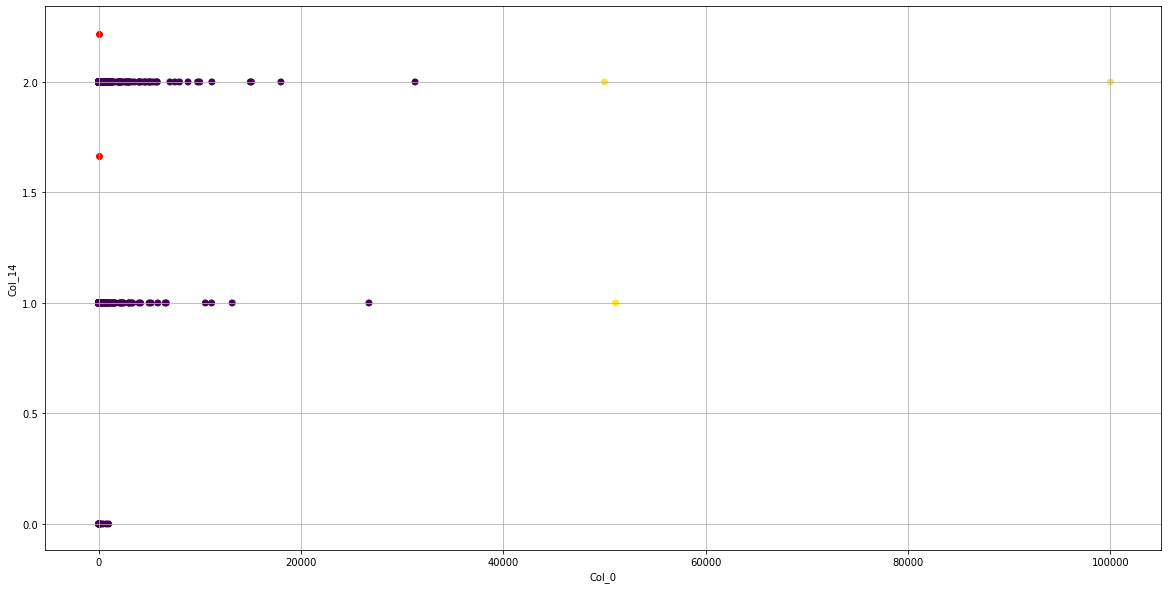

In [456]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.scatter(x = 'Col_14', y = 'Col_0', data = clf, c = kmeans.labels_)
plt.scatter(x = z[:,1], y =z[:,3], c='red')
plt.xlabel("Col_0")
plt.ylabel("Col_14")
plt.show()

From this graph, we can see that any value above ~4500 in Col_14 is most likely classed as 1 (not approved).

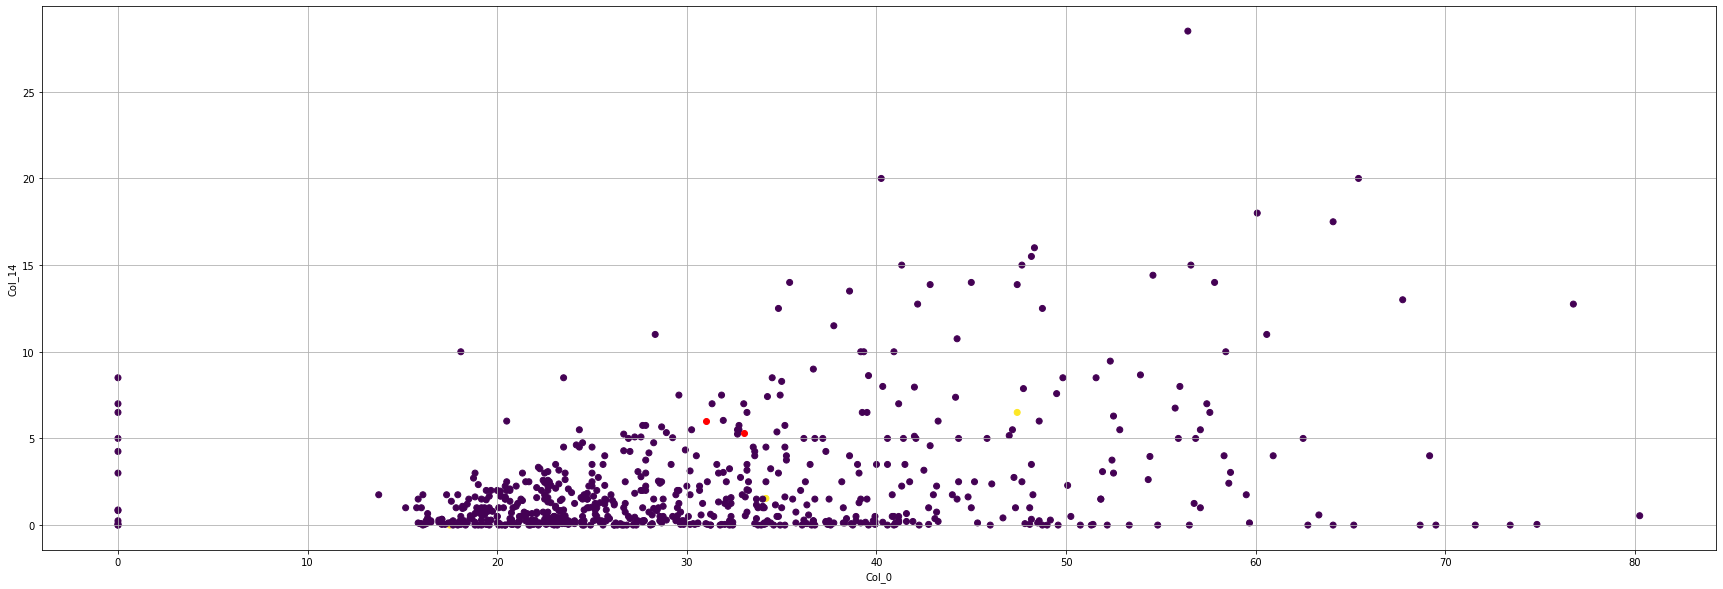

In [449]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter(x = 'Col_1', y = 'Col_7', data = clf, c = kmeans.labels_)
plt.scatter(x = z[:,1], y =z[:,6], c='red')
plt.xlabel("Col_0")
plt.ylabel("Col_14")
plt.show()

It is difficult to find a trend for the yellow dots in this plot.

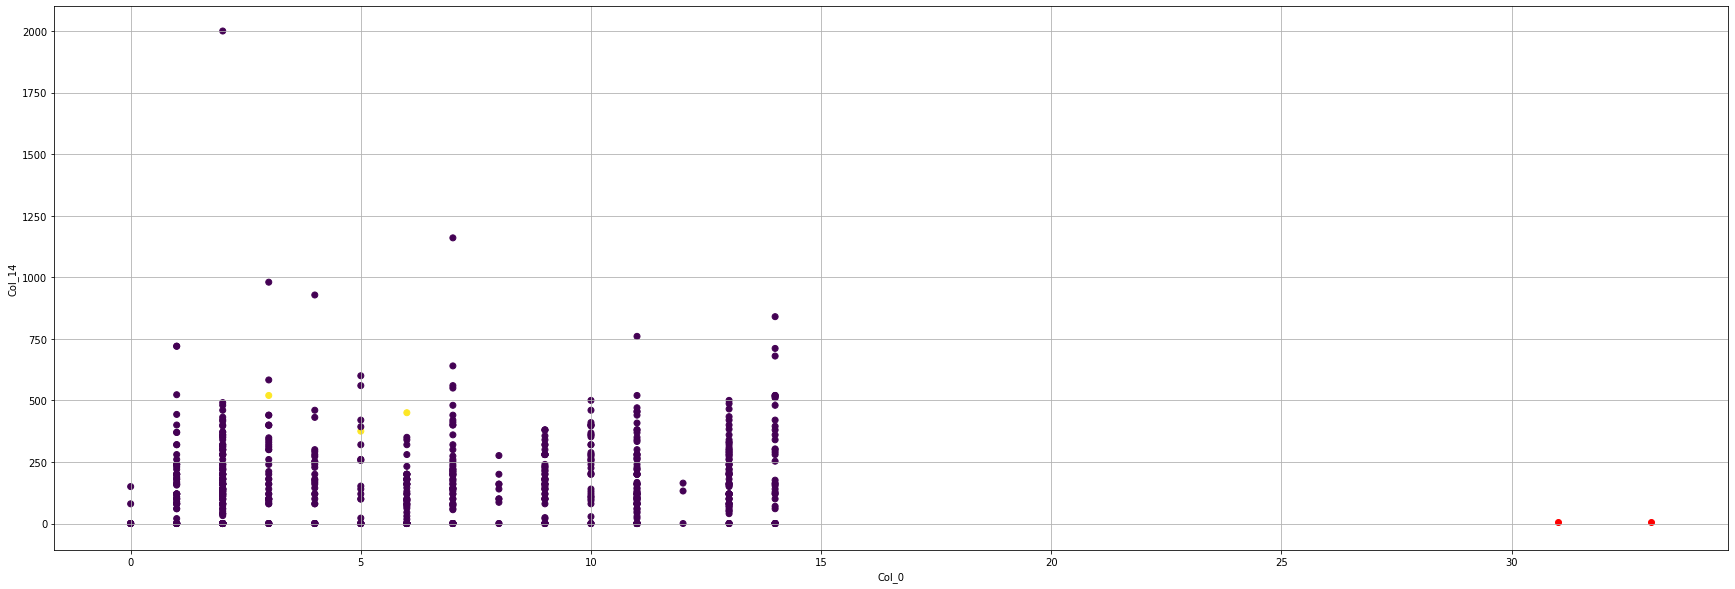

In [438]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter(x = 'Col_5', y = 'Col_13', data = clf, c = kmeans.labels_)
plt.scatter(x = z[:,1], y =z[:,6], c='red')
plt.xlabel("Col_5")
plt.ylabel("Col_13")
plt.show()

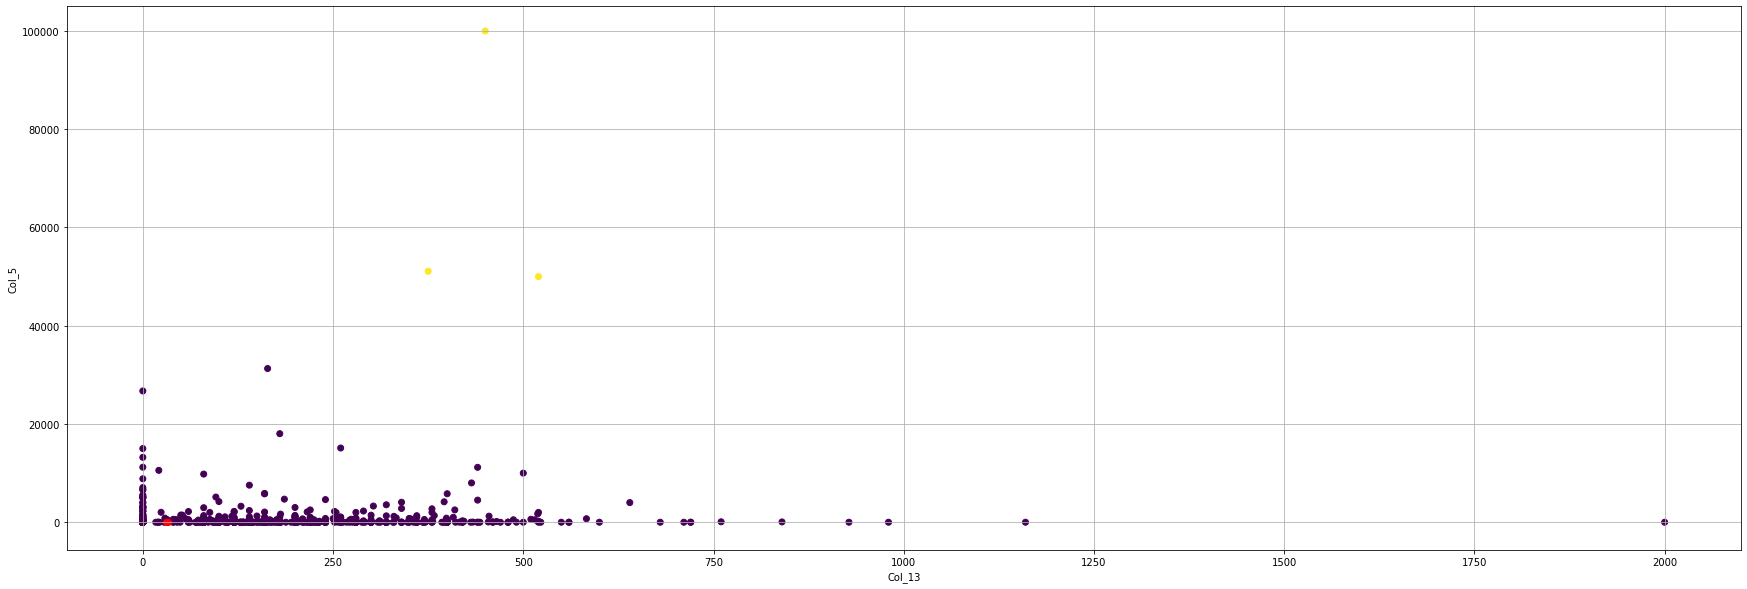

In [461]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter(x = 'Col_13', y = 'Col_14', data = clf, c = kmeans.labels_)
plt.scatter(x = z[:,1], y =z[:,6], c='red')
plt.xlabel("Col_13")
plt.ylabel("Col_5")
plt.show()

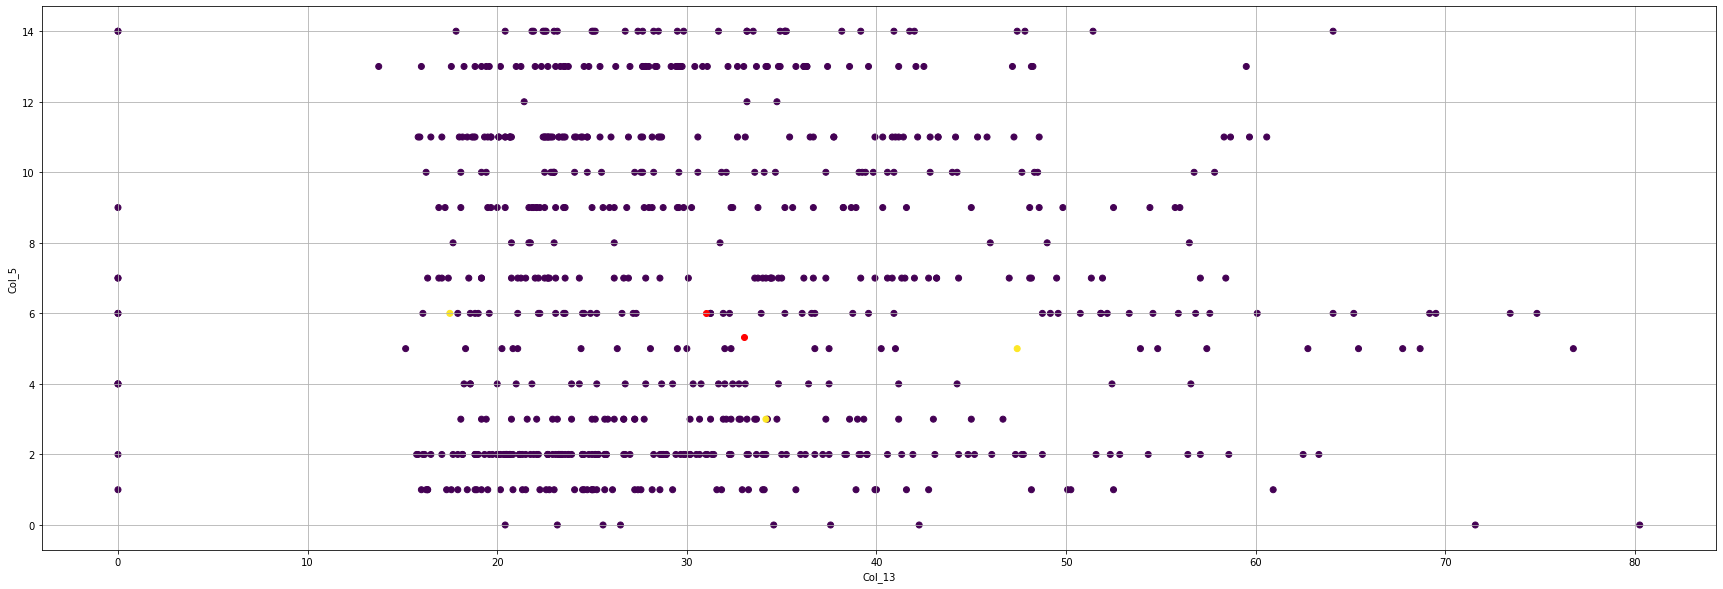

In [462]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter(x = 'Col_1', y = 'Col_5', data = clf, c = kmeans.labels_)
plt.scatter(x = z[:,1], y =z[:,6], c='red')
plt.xlabel("Col_13")
plt.ylabel("Col_5")
plt.show()